In [48]:
#anomaly detection when there's surge in the cpu_util
#using the isolation forest algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
#read the data
df = pd.read_csv('data/m16_cpu_usage_clean.csv')


In [50]:
df.head()

,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103


In [51]:
df['time'] = pd.to_datetime(df['time'])

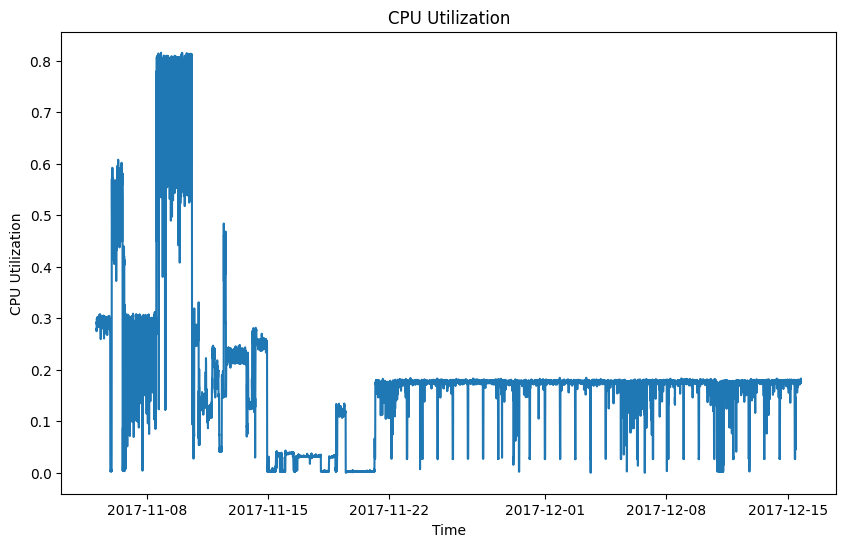

In [52]:
#plot the data
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['cpu_util'])
plt.title('CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.show()

In [53]:
#get data from 2017-11-08 to 2017-11-20
df = df[(df['time'] > '2017-11-08') & (df['time'] < '2017-11-20')]
df.head()

,time,cpu_util
841,2017-11-08 00:05:00+00:00,0.290257
842,2017-11-08 00:10:00+00:00,0.285033
843,2017-11-08 00:15:00+00:00,0.289440
844,2017-11-08 00:20:00+00:00,0.299747
845,2017-11-08 00:25:00+00:00,0.298457


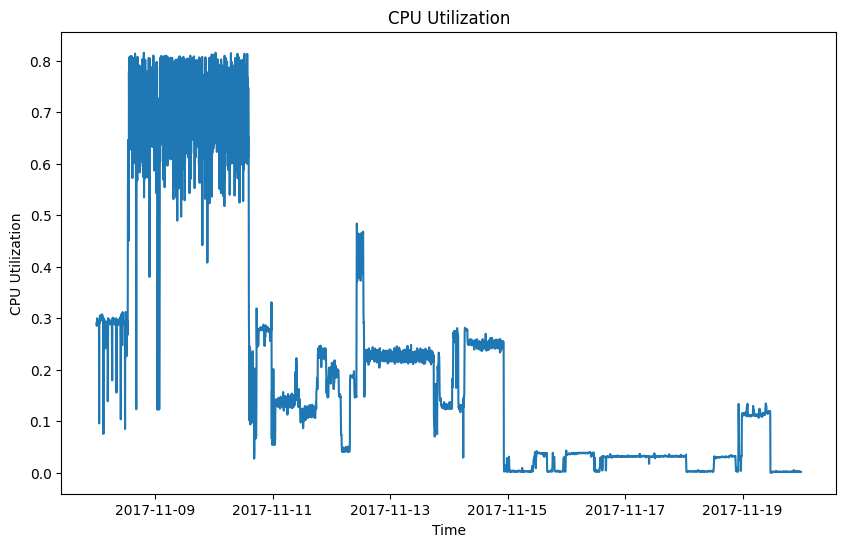

In [54]:
#plot the data
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['cpu_util'])
plt.title('CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.show()


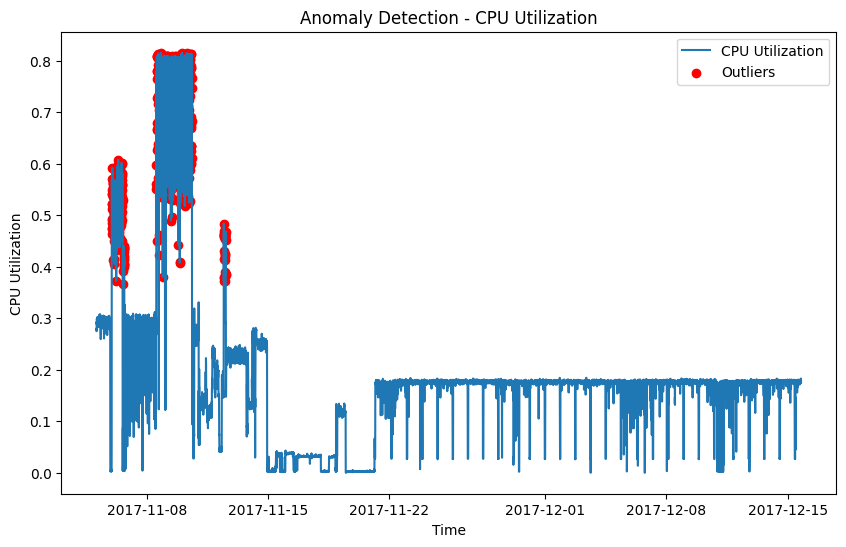

In [193]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
#anomaly detection when there's surge in the cpu_util
# Import necessary libraries

# Load the data
df = pd.read_csv('data/m16_cpu_usage_clean.csv')

# Preprocess the data
df['time'] = pd.to_datetime(df['time'])
X = df[['cpu_util']].values
X_scaled = StandardScaler().fit_transform(X)

# Train the Isolation Forest modelS
model = IsolationForest(contamination=0.06)
model.fit(X_scaled)

# Predict the outliers
outliers = model.predict(X_scaled)

# Add the outlier predictions to the dataframe
df['outlier'] = outliers

# Filter the dataframe to show only the outliers
outliers_df = df[df['outlier'] == -1]

# Plot the outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['time'], df['cpu_util'], label='CPU Utilization')
plt.scatter(outliers_df['time'], outliers_df['cpu_util'], color='red', label='Outliers')
plt.title('Anomaly Detection - CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()


In [155]:
#predict the new data
# Load the new data
df_new = pd.read_csv('data/m16_cpu_usage.csv', delimiter=';')

In [156]:
# Preprocess the data
df_new = df_new.dropna()
df_new['time'] = pd.to_datetime(df_new['time'])
df_new['cpu_util'] = (df_new['cpu_util']/100).astype(float)


In [159]:
#skip the data in every 10 minutes
df_new = df_new.iloc[::10, :]
df_new.head()

,time,machine_id,cpu_util
0,2017-11-05 02:00:00+00:00,m16,0.306600
100,2017-11-05 03:40:00+00:00,m16,0.307500
200,2017-11-05 05:20:00+00:00,m16,0.302267
300,2017-11-05 07:00:00+00:00,m16,0.301667
400,2017-11-05 08:40:00+00:00,m16,0.291000


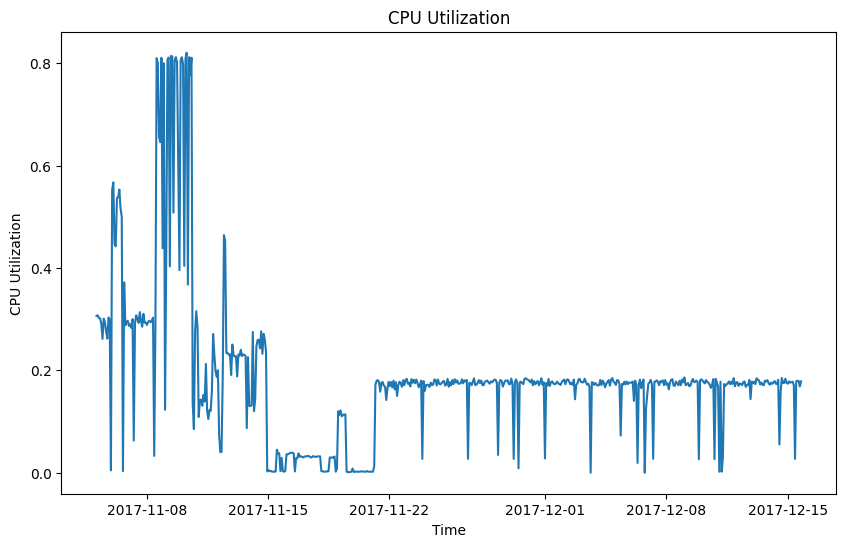

In [160]:
# Plot the new data
plt.figure(figsize=(10,6))
plt.plot(df_new['time'], df_new['cpu_util'])
plt.title('CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.show()


In [161]:
# predict the outliers
X_new = df_new[['cpu_util']].values
X_new_scaled = StandardScaler().fit_transform(X_new)
outliers_new = model.predict(X_new_scaled)


In [162]:
# Add the outlier predictions to the dataframe
df_new['outlier'] = outliers_new

In [163]:
# Filter the dataframe to show only the outliers
outliers_new_df = df_new[df_new['outlier'] == -1]


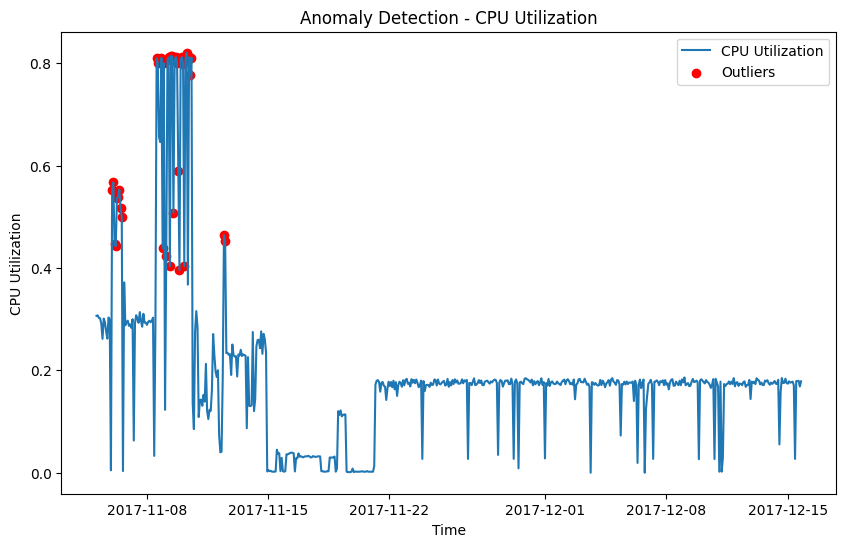

In [164]:
# Plot the outliers
plt.figure(figsize=(10,6))
plt.plot(df_new['time'], df_new['cpu_util'], label='CPU Utilization')
plt.scatter(outliers_new_df['time'], outliers_new_df['cpu_util'], color='red', label='Outliers')
plt.title('Anomaly Detection - CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()


In [165]:
#plot data and the outliers from 2017-11-08 to 2017-11-12
df_new = df_new[(df_new['time'] > '2017-11-08') & (df_new['time'] < '2017-11-12')]
outliers_new_df = df_new[df_new['outlier'] == -1]



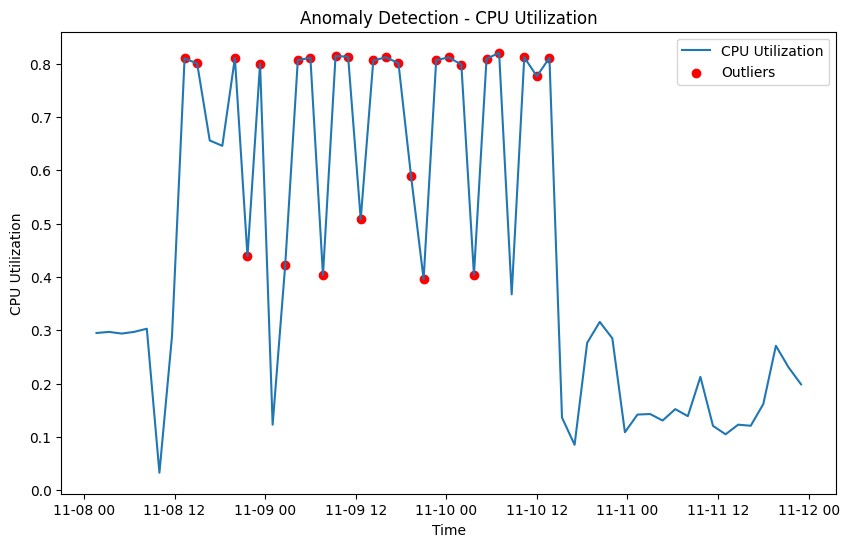

In [166]:
# Plot the outliers
plt.figure(figsize=(10,6))
plt.plot(df_new['time'], df_new['cpu_util'], label='CPU Utilization')
plt.scatter(outliers_new_df['time'], outliers_new_df['cpu_util'], color='red', label='Outliers')
plt.title('Anomaly Detection - CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()

In [167]:
#generate new data with time
new_date = pd.date_range(start='2017-11-08 02:00:00+00:00', end='2017-11-08 05:00:00+00:00', freq='5min')
#create new_Cpu data with np random uniform in range 0.0 to 1.0 every 5 minutes
# new_cpu = np.random.uniform(0.0, 1.0, size=len(new_date))
# new_cpu[0] = 0.35
new_cpu = np.array([
  0.35,
  0.385,
  0.4,
  0.32,
  0.1,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.2,
  0.15,
  0.24,
  0.234543,
  0.265,
  0.32,
  0.7,
  0.8,
  0.82,
  0.79,
  0.8,
  0.78,
  0.5,
  0.4,
  0.43,
  0.1,
  0.123,
  0.15,
  0.94,
  0.95,
  0.952423,
  0.923,
  0.9,
  0.8,
  0.82,
  0.79,
  0.8,
])

new_date.shape, new_cpu.shape

((37,), (37,))

In [184]:
import numpy as np

# Step 1: Calculate the mean and standard deviation
mean = np.mean(new_cpu)
std_dev = np.std(new_cpu)

# Step 2: Calculate the Z-scores
z_scores = (new_cpu - mean) / std_dev

# Step 3: Define a threshold (for example, a Z-score of 3)
threshold = 1.2
outliers = np.where(np.abs(z_scores) > threshold)
print(z_scores)


[-0.76613246 -0.64620672 -0.59480998 -0.86892595 -1.62274486  0.77576986
  0.84429885  0.74150536  0.77576986  0.70724087 -1.2800999  -1.45142238
 -1.14304192 -1.16174005 -1.05738068 -0.86892595  0.4331249   0.77576986
  0.84429885  0.74150536  0.77576986  0.70724087 -0.25216502 -0.59480998
 -0.49201649 -1.62274486 -1.54393652 -1.45142238  1.2554728   1.2897373
  1.29803959  1.19722316  1.11841482  0.77576986  0.84429885  0.74150536
  0.77576986]


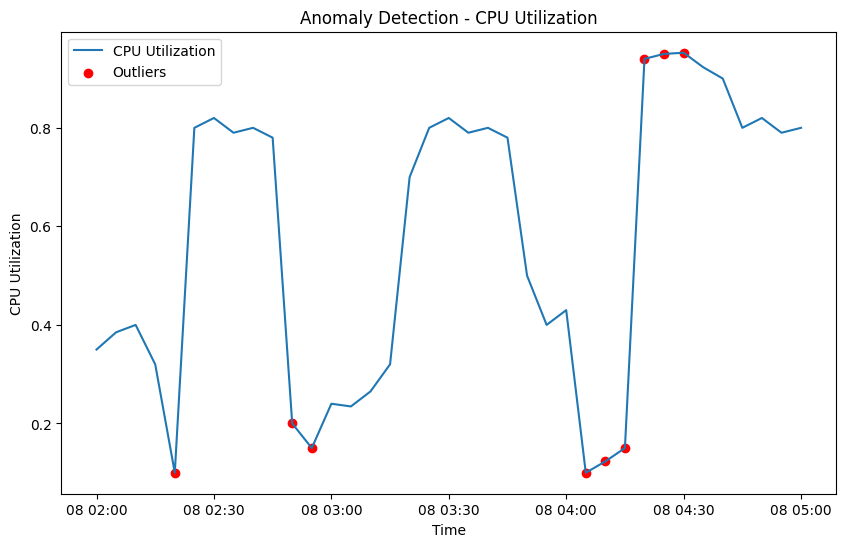

In [185]:
# Plot the outliers
plt.figure(figsize=(10,6))
plt.plot(new_date, new_cpu, label='CPU Utilization')
plt.scatter(new_date[outliers], new_cpu[outliers], color='red', label='Outliers')
plt.title('Anomaly Detection - CPU Utilization')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()
